In [12]:
import os, json
import numpy as np

from vscworkflows.tools.optics import SolarCell
from scipy.io import loadmat

import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
import tikzplotlib

figures_dir = "../../figures/slme"

color0 = "#B81F1F"
color1 = "#2368A2"

In [13]:
data = loadmat("data/Effiency_models.mat")
data.update(loadmat("data/SLME_results.mat"))

In [14]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'EgRange', 'mEff_abscoeff', 'mEff_fermi', 'mEff_logistic', 'testRange', 'BandGap', 'Compounds', 'None', 'SLME', '__function_workspace__'])

In [15]:
bandgaps = np.linspace(0.3, 3, 100)
sq_limit = np.array([SolarCell.sq(bg)[0] for bg in bandgaps])

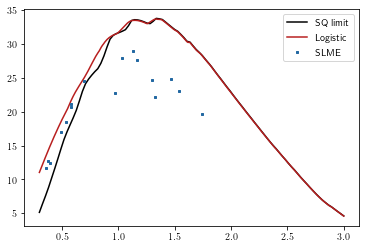

In [16]:
plt.plot(bandgaps, sq_limit*1e2, "k")
plt.plot(data["EgRange"][0,:], data["mEff_logistic"][0], color=color0)
plt.plot(data["BandGap"], data["SLME"], "sk", markersize=2, color=color1)
plt.legend(["SQ limit", "Logistic", "SLME"])
tikzplotlib.save(filepath=os.path.join(figures_dir, "logistic_data.tex"), 
                 add_axis_environment=False)

In [6]:
for compound, bandgap, slme in zip(data["Compounds"], data["BandGap"], data["SLME"]):
    data_str = "\\node [datapoint] (" + compound[0][0].split("^")[0].replace("_","") + \
        "-" + compound[0][0].split("^")[1].replace("#","").replace("{", "").replace("}", "") + \
        ") at (axis cs:" + str(bandgap[0]) + ", " + str(slme[0]) + ") {};"
    print(data_str)
    
print()

for compound, bandgap, slme in zip(data["Compounds"], data["BandGap"], data["SLME"]):
    label_str = "\\node [compound] (" + compound[0][0].split("^")[0].replace("_","") + \
        "-" + compound[0][0].split("^")[1].replace("#","").replace("{", "").replace("}", "") + \
        "_label) at (axis cs:" + str(bandgap[0]) + ", " + str(slme[0]) + ") {\\ce{" + \
        compound[0][0].replace("#", "\\#") + "}};"
    
    print(label_str)
    
    connection_str = "\draw [] (" +compound[0][0].split("^")[0].replace("_","") + \
        "-" + compound[0][0].split("^")[1].replace("#","").replace("{", "").replace("}", "") +\
    ") -- (" + compound[0][0].split("^")[0].replace("_","") + \
        "-" + compound[0][0].split("^")[1].replace("#","").replace("{", "").replace("}", "") + \
        "_label);"
    
    print(connection_str)

\node [datapoint] (CuInSe2-115) at (axis cs:0.58, 20.7) {};
\node [datapoint] (Cu2ZnGeTe4-121) at (axis cs:0.49, 17.06) {};
\node [datapoint] (Cu2ZnSnTe4-121) at (axis cs:0.58, 21.16) {};
\node [datapoint] (Cu2CdSnSe4-121) at (axis cs:0.7, 24.47) {};
\node [datapoint] (Cu2HgGeSe4-121) at (axis cs:0.54, 18.51) {};
\node [datapoint] (Cu2HgGeTe4-121) at (axis cs:0.38, 12.72) {};
\node [datapoint] (Cu2HgSnSe4-121) at (axis cs:0.36, 11.64) {};
\node [datapoint] (Cu2HgSnTe4-121) at (axis cs:0.39, 12.4) {};
\node [datapoint] (CuInSe2-122) at (axis cs:1.33, 22.1) {};
\node [datapoint] (CuInS2-122) at (axis cs:1.54, 23.1) {};
\node [datapoint] (CuInTe2-122) at (axis cs:1.03, 28.0) {};
\node [datapoint] (CuGaTe2-122) at (axis cs:1.47, 24.8) {};
\node [datapoint] (AgGaSe2-216) at (axis cs:1.3, 24.7) {};
\node [datapoint] (AgInTe2-216) at (axis cs:1.17, 27.6) {};
\node [datapoint] (Cu7TlS4-87) at (axis cs:0.97, 22.8) {};
\node [datapoint] (AgInS2-122) at (axis cs:1.74, 19.7) {};
\node [datapoint] 